## MLP多層感知器 ##
* 以Mnist資料集進行程式碼練習, 辦認0~9的數字
* 模型訓練及驗證

In [65]:
from keras.datasets import mnist #下載資料集
from sklearn.preprocessing import MinMaxScaler #feature正規化
from keras.utils import np_utils #Label處理one-hot-encoding
from keras.models import Sequential #建立Sequential序貫模型
from keras.layers import Dense #建立層
from keras.layers import Dropout #拋棄
import matplotlib.pyplot as plt #畫出來
import numpy as np
np.random.seed(10)

In [66]:
#下載資料集 .load_data()
#from keras.datasets import mnist
(train_feature, train_label),(test_feature,test_label) = mnist.load_data()

In [67]:
#確認資料數量及維度
print(train_feature.shape, train_label.shape)
print(test_feature.shape, test_label.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [68]:
#維度處理 reshape()
#將28*28，轉換為784的一維向量；float
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

In [69]:
#看看train資料變成什麼樣子
print('訓練資料shape：',train_feature_vector.shape)
print('測試資料shape：',test_feature_vector.shape)

訓練資料shape： (60000, 784)
測試資料shape： (10000, 784)


In [70]:
#feature處理_正規化
#from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_feature_normalize = scaler.fit_transform(train_feature_vector)
test_feature_normalize = scaler.fit_transform(test_feature_vector)

In [71]:
train_feature_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [72]:
#Label處理_one-hot-encoding
#from keras.utils import np_utils
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [73]:
train_label_onehot[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [74]:
#建立模型 Sequential()
#from keras.models import Sequential
model = Sequential()

In [75]:
#建立輸入層及隱藏層 add()
#drop 20%，避免overfitting
#輸出設256
#輸入是784
#kernel_initializer權重初始化，設normal
#activation，選用ReLU
##ReLU，忽略負數，值在0~無限大之間；計算速度較快、收斂速度快
##Sigmoid，值在0~1之間，分布兩極化，大部分不是 0就是 1，適合二分法；反向更新權重時，容易梯度消失，以及收斂曲線不平滑
##tanh，值在-1~1之間，傳導有負值，是zero-centered，但仍容易梯度消失
##softmax，值在0~1之間，機率總和等於 1；適合多分類使用
#from keras.layers import Dense

model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))

In [76]:
#建立第二層隱藏層
#drop 20%，避免overfitting
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))

In [77]:
#建立輸出層 add()
#輸出是10
#activation，選用softmax；值在0~1之間，機率總和等於 1；適合多分類使用
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [78]:
#設定模型訓練方式 compile()
#loss選用categorical_crossentropy；當預測值與實際值愈相近，損失函數就愈小，反之差距很大，會更影響損失函數的值
#optimizer優化器(偏微分逐步按著下降的方向)選用
#metrics衡量指標 準確度
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
#進行訓練 fit()
train_history = model.fit(x=train_feature_normalize, y=train_label_onehot, 
                          validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4570 - accuracy: 0.8720 - val_loss: 0.1821 - val_accuracy: 0.9473
Epoch 2/10
 - 1s - loss: 0.1713 - accuracy: 0.9497 - val_loss: 0.1303 - val_accuracy: 0.9628
Epoch 3/10
 - 1s - loss: 0.1202 - accuracy: 0.9647 - val_loss: 0.1077 - val_accuracy: 0.9676
Epoch 4/10
 - 1s - loss: 0.0930 - accuracy: 0.9716 - val_loss: 0.0971 - val_accuracy: 0.9696
Epoch 5/10
 - 1s - loss: 0.0729 - accuracy: 0.9778 - val_loss: 0.0932 - val_accuracy: 0.9731
Epoch 6/10
 - 1s - loss: 0.0591 - accuracy: 0.9816 - val_loss: 0.0869 - val_accuracy: 0.9733
Epoch 7/10
 - 1s - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0813 - val_accuracy: 0.9746
Epoch 8/10
 - 1s - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.0837 - val_accuracy: 0.9763
Epoch 9/10
 - 1s - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0794 - val_accuracy: 0.9775
Epoch 10/10
 - 1s - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0885 - val_accuracy: 0.9756


In [80]:
#進行預測 predict_classes()
prediction = model.predict_classes(test_feature_normalize)

In [81]:
# 自定呈現方式
import matplotlib.pyplot as plt
def show_image_labels_predictions(images, lables, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[start_id], cmap='binary')

        if len(predictions)>0:
            title = 'pred = '+ str(predictions[start_id])
            title += ('(O)' if predictions[start_id]==lables[start_id] else '(X)')
            title += '\nlabel = '+ str(lables[start_id])
        else:
            title = 'label = '+ str(lables[start_id])

        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

In [82]:
#評估準確率 evaluate()
#scores[0]是loss值
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('準確率:{:.3f}'.format(scores[1]))

10000/10000 [==============================] - 0s 18us/step
準確率:0.978


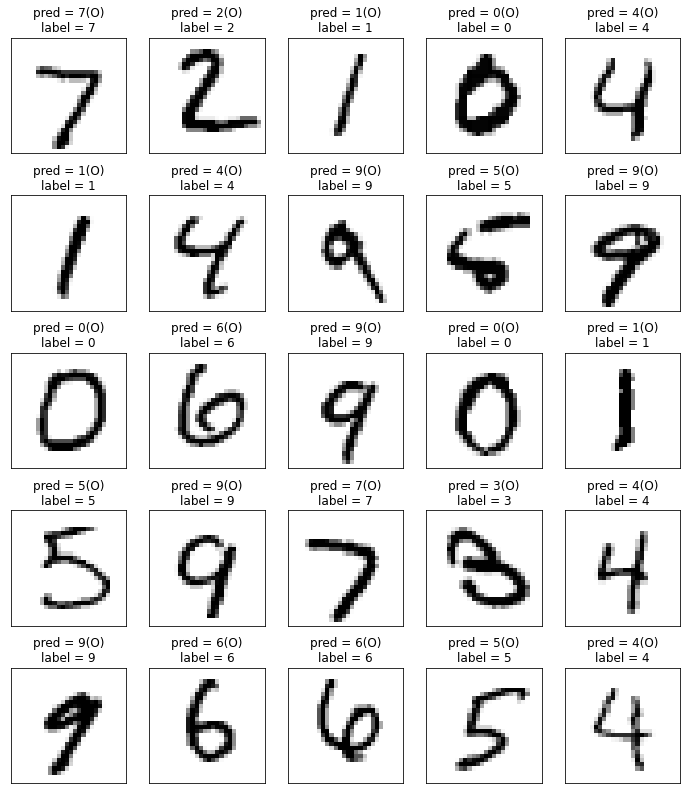

In [83]:
#將圖片與預測資料同時呈現
show_image_labels_predictions(test_feature, test_label, prediction, 0, 25)

In [84]:
#儲存模型
model.save('Mnist_MLPmodle.h5')
print("saved:'Mnist_MLPmodle.h5'")

saved:'Mnist_MLPmodle.h5'


In [85]:
#儲存權重(沒有模型)
model.save_weights('Mnist_MLPmodle.weight')
print("saved:'Mnist_MLPmodle.weight'")
del model

saved:'Mnist_MLPmodle.weight'
